<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    machine learning 12
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
    Clustering / Hierarchical
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>

خوشه‌بندی سلسله‌مراتبی

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: پس از تکمیل این جلسه، شما قادر خواهید بود

 از کتابخانه $learn$-$scikit$ برای خوشه‌بندی سلسله‌مراتبی استفاده کنید

  دندروگرام برای تجسم خوشه‌بندی ایجاد کنید

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

<h1>فهرست مطالب</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#hierarchical_agglomerative">خوشه‌بندی سلسله‌مراتبی - تجمعی</a></li>
            <ol>
                <li><a href="#generating_data">تولید داده تصادفی</a></li>
                <li><a href="#agglomerative_clustering">خوشه‌بندی تجمعی</a></li>
                <li><a href="#dendrogram">دندروگرام مرتبط با خوشه‌بندی سلسله‌مراتبی تجمعی</a></li>
            </ol>            
        <li><a href="#clustering_vehicle_dataset">خوشه‌بندی روی مجموعه داده وسایل نقلیه</a></li>
            <ol>
                <li><a href="#data_cleaning">پاکسازی داده</a></li>
                <li><a href="#clustering_using_scipy">خوشه‌بندی با استفاده از Scipy</a></li>
                <li><a href="#clustering_using_skl">خوشه‌بندی با استفاده از scikit-learn</a></li>
            </ol>
    </ol>
</div>
<br>
<hr>

<h1 id="hierarchical_agglomerative">خوشه‌بندی سلسله‌مراتبی - تجمعی</h1>

ما به یک تکنیک خوشه‌بندی خواهیم پرداخت که <b>خوشه‌بندی سلسله‌مراتبی تجمعی</b> نام دارد

به یاد داشته باشید که روش تجمعی یک رویکرد از پایین به بالا است

در این آزمایشگاه، ما خوشه‌بندی تجمعی را بررسی خواهیم کرد که محبوب‌تر از خوشه‌بندی تقسیمی است

همچنین از **پیوند کامل** به عنوان معیار پیونددهی استفاده خواهیم کرد


!توجه: شما می‌توانید از پیوند میانگین نیز در هر جایی که پیوند کامل استفاده می‌شود، برای مشاهده تفاوت استفاده کنید

# نمونه‌ای از خوشه‌بندی سلسله مراتبی

$Hierarchical Clustering$ فرمول‌های 

1. فاصله اقلیدسی (Euclidean Distance)
$$
d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{k=1}^{p}(x_{ik} - x_{jk})^2}
$$

2. معیارهای پیوند (Linkage Criteria)

تک‌پیوند (Single):
$$
d(A,B) = \min_{a \in A, b \in B} d(a,b)
$$

کامل‌پیوند (Complete):
$$d(A,B) = \max_{a \in A, b \in B} d(a,b)$$

میانگین‌پیوند (Average):
$$
d(A,B) = \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a,b)
$$

وارد (Ward):
$$
\Delta(A,B) = \frac{|A||B|}{|A|+|B|} \cdot \|\mu_A - \mu_B\|^2
$$
$$
\mu_C = \frac{1}{|C|} \sum_{x \in C} x
$$

3. واریانس درون‌خوشه‌ای
$$
V(C) = \sum_{x \in C} \|x - \mu_C\|^2
$$

4. ماتریس فاصله
$$
D = 
\begin{bmatrix}
0 & d_{12} & \cdots & d_{1n} \\
d_{21} & 0 & \cdots & d_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
d_{n1} & d_{n2} & \cdots & 0
\end{bmatrix}
$$

<p>
  <img src="Hierarchical 1.jpg" alt="1" width="500">
  <img src="Hierarchical 2.jpg" alt="2" width="502">
</p>


In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 

<h1 id="generating_data">تولید داده تصادفی</h1>

ما مجموعه‌ای از داده‌ها را با استفاده از کلاس $make\_blobs$ تولید خواهیم کرد

این پارامترها را در $make\_blobs$ وارد کنید:

- **$n\_samples$**: تعداد کل نقاط که به طور مساوی بین خوشه‌ها تقسیم شده‌اند 
    - عددی بین ۱۰ تا ۱۵۰۰ انتخاب کنید
<br> <br>
- **$centers$**: تعداد مراکزی که باید تولید شوند، یا موقعیت‌های ثابت مراکز
    - آرایه‌ای از مختصات $x,y$ برای تولید مراکز انتخاب کنید. ۱ تا ۱۰ مرکز داشته باشید (مثال: $centers$=$[[1,1], [2,5]]$)
<br> <br>
- **$cluster\_std$**: انحراف معیار خوشه‌ها. هر چه عدد بزرگ‌تر باشد، خوشه‌ها از هم فاصله بیشتری دارند
    - عددی بین ۰.۵ تا ۱.۵ انتخاب کنید
<br> <br>

نتیجه را در **$X1$** و **$y1$** ذخیره کنید


In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
X1, y1

(array([[ 2.54042898e+00,  4.91141935e+00],
        [ 1.03889300e+01,  2.41046067e+00],
        [ 9.54634993e+00,  4.35260901e+00],
        [ 2.76964468e-01,  2.04188742e+00],
        [ 3.36335030e+00,  4.69925199e+00],
        [-4.82100398e-01, -1.94557394e+00],
        [ 6.83174388e-01,  1.45807557e+00],
        [-2.62848760e+00, -8.42574649e-01],
        [ 4.91771672e-02, -2.89256106e-01],
        [ 6.10227269e+00,  2.78768854e+00],
        [ 9.44793557e+00,  5.73277618e+00],
        [-8.46726125e-01, -2.37968902e+00],
        [-2.00188603e+00, -4.18794152e-01],
        [ 4.14269203e+00,  4.53862684e+00],
        [ 4.59089405e+00,  4.24543846e+00],
        [-3.13471604e+00, -9.75721945e-01],
        [-2.96700395e+00, -1.58800407e+00],
        [ 1.05772629e+01,  3.93707104e+00],
        [ 4.54560926e+00,  2.76795689e+00],
        [ 3.50955644e+00,  4.67542069e+00],
        [ 8.81250281e+00,  5.08287704e+00],
        [-3.37809687e+00, -2.45460072e+00],
        [-1.81644591e+00, -5.185

نمودار پراکندگی داده‌های تولید شده تصادفی را رسم کنید

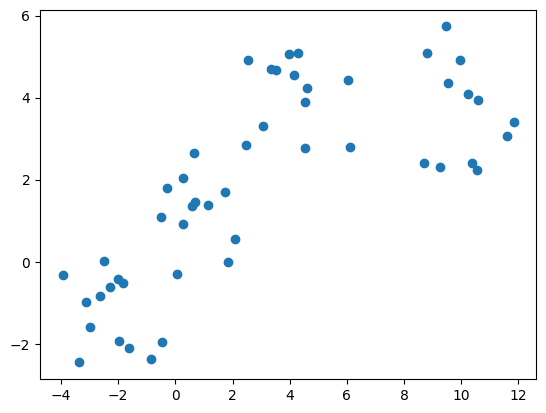

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o") 

<hr>
<h3 id="agglomerative_clustering">خوشه‌بندی تجمعی</h3>

کار خود را با خوشه‌بندی نقاط داده تصادفی که به تازگی ایجاد کرده‌ایم آغاز می‌کنیم

کلاس **$Agglomerative Clustering$** به دو ورودی نیاز دارد 
<br> <br>

- **n_clusters**: تعداد خوشه‌هایی که باید تشکیل شوند و همچنین تعداد مراکزی که باید تولید شوند 
    - مقدار: ۴
<br> <br>

- **linkage**: معیار پیوندی که باید استفاده شودمعیار پیوند، فاصله مورد استفاده بین مجموعه‌های مشاهده را تعیین می‌کند الگوریتم جفت خوشه‌هایی را ادغام می‌کند که این معیار را به حداقل برسانند
    -  $"complete"$ :مقدار   

    - **توجه**: توصیه می‌شود که همه موارد را با $"average"$ (پیوند میانگین) نیز امتحان کنید
<br> <br>

نتیجه را در متغیری به نام **$agglom$** ذخیره کنید

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = "average")

مدل را با داده‌های **$X2$** و **$y2$** که در بالا تولید شده‌اند برازش دهید.

In [5]:
agglom.fit(X1,y1)

,"n_clusters n_clusters: int or None, default=2The number of clusters to find. It must be ``None`` if``distance_threshold`` is not ``None``.",4
,"metric metric: str or callable, default=""euclidean""Metric used to compute the linkage. Can be ""euclidean"", ""l1"", ""l2"",""manhattan"", ""cosine"", or ""precomputed"". If linkage is ""ward"", only""euclidean"" is accepted. If ""precomputed"", a distance matrix is neededas input for the fit method. If connectivity is None, linkage is""single"" and affinity is not ""precomputed"" any valid pairwise distancemetric can be assigned.For an example of agglomerative clustering with different metrics, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_clustering_metrics.py`... versionadded:: 1.2",'euclidean'
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the output of the computation of the tree.By default, no caching is done. If a string is given, it is thepath to the caching directory.",None
,"connectivity connectivity: array-like, sparse matrix, or callable, default=NoneConnectivity matrix. Defines for each sample the neighboringsamples following a given structure of the data.This can be a connectivity matrix itself or a callable that transformsthe data into a connectivity matrix, such as derived from`kneighbors_graph`. Default is ``None``, i.e, thehierarchical clustering algorithm is unstructured.For an example of connectivity matrix using:class:`~sklearn.neighbors.kneighbors_graph`, see:ref:`sphx_glr_auto_examples_cluster_plot_ward_structured_vs_unstructured.py`.",None
,"compute_full_tree compute_full_tree: 'auto' or bool, default='auto'Stop early the construction of the tree at ``n_clusters``. This isuseful to decrease computation time if the number of clusters is notsmall compared to the number of samples. This option is useful onlywhen specifying a connectivity matrix. Note also that when varying thenumber of clusters and using caching, it may be advantageous to computethe full tree. It must be ``True`` if ``distance_threshold`` is not``None``. By default `compute_full_tree` is ""auto"", which is equivalentto `True` when `distance_threshold` is not `None` or that `n_clusters`is inferior to the maximum between 100 or `0.02 * n_samples`.Otherwise, ""auto"" is equivalent to `False`.",'auto'
,"linkage linkage: {'ward', 'complete', 'average', 'single'}, default='ward'Which linkage criterion to use. The linkage criterion determines whichdistance to use between sets of observation. The algorithm will mergethe pairs of cluster that minimize this criterion.- 'ward' minimizes the variance of the clusters being merged.- 'average' uses the average of the distances of each observation of the two sets.- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.- 'single' uses the minimum of the distances between all observations of the two sets... versionadded:: 0.20 Added the 'single' optionFor examples comparing different `linkage` criteria, see:ref:`sphx_glr_auto_examples_cluster_plot_linkage_comparison.py`.",'average'
,"distance_threshold distance_threshold: float, default=NoneThe linkage distance threshold at or above which clusters will not bemerged. If not ``None``, ``n_clusters`` must be ``None`` and``compute_full_tree`` must be ``True``... versionadded:: 0.21",None
,"compute_distances compute_distances: bool, default=FalseComputes distances between clusters even if `distance_threshold` is notused. This can be used to make dendrogram visualization, but introducesa computational and memory overhead... versionadded:: 0.24For an example of dendrogram visualization, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_dendrogram.py`.",False


!کد زیر را اجرا کنید تا خوشه‌بندی نمایش داده شود<br>
به یاد داشته باشید که کد و نظرات را بخوانید تا درک بیشتری از نحوه عملکرد رسم‌نمودار به دست آورید

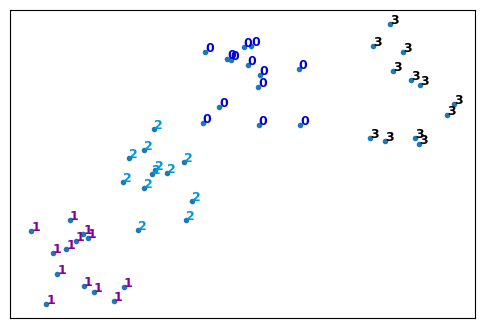

In [6]:
# یک شکل با ابعاد ۶ در ۴ اینچ ایجاد کنید.
plt.figure(figsize=(6,4))

# این دو خط کد برای مقیاس‌دهی نقاط داده به سمت پایین استفاده می‌شوند،
# در غیر این صورت نقاط داده بسیار پراکنده خواهند شد.

# یک محدوده حداقل و حداکثر برای X1 ایجاد کنید.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# میانگین فاصله برای X1 را به دست آورید
X1 = (X1 - x_min) / (x_max - x_min)

# این حلقه تمام نقاط داده را نمایش می‌دهد
for i in range(X1.shape[0]):
    # نقاط داده را با مقدار خوشه مربوطه جایگزین کنید
    # (به عنوان مثال ۰) و با یک نقشه رنگ (plt.cm.spectral) کدگذاری رنگ شده است 
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={"weight": "bold", "size": 9})
    
# تیک‌های محور x، تیک‌های محور y، و محورهای x و y را حذف کنید 
plt.xticks([])
plt.yticks([])
#plt.axis("off")

plt.scatter(X1[:, 0], X1[:, 1], marker=".")

plt.show()

<h3 id="dendrogram">دندروگرام مرتبط با خوشه‌بندی سلسله‌مراتبی تجمعی</h3>

به یاد داشته باشید که یک **ماتریس فاصله** شامل **فاصله هر نقطه تا هر نقطه دیگر در مجموعه داده** است

از تابع **$distance\_matrix$** استفاده کنید که به **دو ورودی** نیاز دارد

از ماتریس ویژگی **$X1$** به عنوان هر دو ورودی استفاده کنید و ماتریس فاصله را در متغیری به نام **$dist\_matrix$** ذخیره کنید <br> <br>
به یاد داشته باشید که مقادیر فاصله متقارن هستند و قطر اصلی آن‌ها صفر است. این یکی از راه‌های اطمینان از صحت ماتریس شماست <br> (ماتریس $dist\_matrix$ را چاپ کنید تا از صحت آن مطمئن شوید)

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.58404277 0.44956263 ... 0.50438937 0.61612401 0.53201751]
 [0.58404277 0.         0.24315775 ... 0.70993456 0.1109967  0.07213945]
 [0.44956263 0.24315775 0.         ... 0.75180473 0.20290042 0.25011957]
 ...
 [0.50438937 0.70993456 0.75180473 ... 0.         0.80456907 0.6379232 ]
 [0.61612401 0.1109967  0.20290042 ... 0.80456907 0.         0.17410442]
 [0.53201751 0.07213945 0.25011957 ... 0.6379232  0.17410442 0.        ]]


با استفاده از کلاس **$linkage$** از ماژول $hierarchy،$ پارامترهای زیر را وارد کنید:

- ماتریس فاصله
- $"complete"$ برای پیوند کامل

نتیجه را در متغیری به نام **$Z$** ذخیره کنید

In [8]:
Z = hierarchy.linkage(dist_matrix, "complete")

C:\Users\mrb\AppData\Local\Temp\ipykernel_3740\3421130870.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, "complete")


یک خوشه‌بندی سلسله‌مراتبی معمولاً به صورت یک دندروگرام نمایش داده می‌شود، همان‌طور که در سلول بعدی نشان داده شده است

هر ادغام با یک خط افقی نشان داده می‌شود. مختصات $y$ خط افقی، شباهت دو خوشه‌ای است که ادغام شده‌اند، که در آن شهرها به عنوان خوشه‌های تکی در نظر گرفته می‌شوند

با حرکت از لایه پایین به سمت گره بالایی، یک دندروگرام به ما امکان می‌دهد تاریخچه ادغام‌هایی را که منجر به خوشه‌بندی نمایش داده شده شده است، بازسازی کنیم

در مرحله بعد، دندروگرام را در متغیری به نام **$dendro$** ذخیره می‌کنیم

با انجام این کار، دندروگرام نیز نمایش داده خواهد شد.
با استفاده از کلاس **$dendrogram$** از ماژول $hierarchy$ ، پارامتر زیر را وارد کنید 

- Z

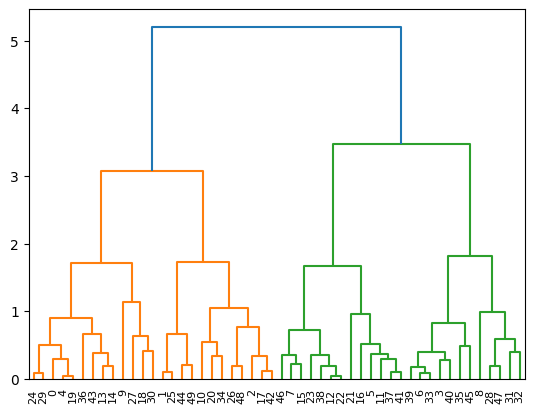

In [9]:
dendro = hierarchy.dendrogram(Z)

## تمرین

ما از پیوند **کامل** برای مورد خود استفاده کردیم، آن را به پیوند **میانگین** تغییر دهید تا ببینید دندروگرام چگونه تغییر می‌کند

In [10]:
# کد خود را اینجا بنویسید



<details><summary>برای مشاهده راه‌حل اینجا کلیک کنید</summary>

```python
Z = hierarchy.linkage(dist_matrix, "average")
dendro = hierarchy.dendrogram(Z)

```

</details>


<hr>
<h1 id="clustering_vehicle_dataset">خوشه‌بندی روی مجموعه داده وسایل نقلیه</h1>

فرض کنید یک سازنده خودرو، نمونه‌های اولیه‌ای برای یک وسیله نقلیه جدید توسعه داده است. قبل از معرفی مدل جدید به خط تولید خود، سازنده می‌خواهد مشخص کند کدام خودروهای موجود در بازار بیشترین شباهت را به نمونه‌های اولیه دارند - یعنی چگونه می‌توان خودروها را دسته‌بندی کرد، کدام گروه بیشترین شباهت را با مدل جدید دارد و بنابراین با کدام مدل‌ها رقابت خواهد کرد

هدف ما در اینجا، استفاده از روش‌های خوشه‌بندی برای یافتن متمایزترین خوشه‌های وسایل نقلیه است. این کار خودروهای موجود را خلاصه می‌کند و به سازندگان کمک می‌کند تا در مورد عرضه مدل‌های جدید تصمیم‌گیری کنند

In [11]:
import requests

url = "https://raw.githubusercontent.com/HAKAN-Fatemi/machine-learning-HAKAN/main/file_csv/cars_clus.csv"
response = requests.get(url)

with open("cars_clus.csv", "wb") as f:
    f.write(response.content)

## خواندن داده

بیایید مجموعه داده را بخوانیم تا ببینیم سازنده چه ویژگی‌هایی درباره مدل‌های موجود جمع‌آوری کرده است

In [12]:
filename = "cars_clus.csv"

pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### :مجموعه ویژگی‌ها شامل موارد زیر است
- قیمت بر حسب هزار (price)
- اندازه موتور (engine_s)
- قدرت اسب‌بخار (horsepow)
- فاصله بین دو محور (wheelbas)
- عرض (width)
- طول (length)
- وزن خالص خودرو (curb_wgt)
- ظرفیت سوخت (fuel_cap)
- بازدهی سوخت (mpg)

<h2 id="data_cleaning">پاکسازی داده</h2>

بیایید مجموعه داده را با حذف سطرهایی که مقدار $null$ دارند پاکسازی کنیم:

In [13]:
print ("Shape of dataset before cleaning: ", pdf.size)

pdf[[ "sales", "resale", "type", "price", "engine_s",
       "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap",
       "mpg", "lnsales"]] = pdf[["sales", "resale", "type", "price", "engine_s",
       "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap",
       "mpg", "lnsales"]].apply(pd.to_numeric, errors="coerce")

pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### انتخاب ویژگی

بیایید مجموعه ویژگی‌های خود را انتخاب کنیم:

In [14]:
featureset = pdf[["engine_s",  "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]]

### نرمال‌سازی

حال می‌توانیم مجموعه ویژگی‌ها را نرمال‌سازی کنیم. **$MinMaxScaler$** ویژگی‌ها را با مقیاس‌دهی هر ویژگی به یک بازه مشخص تبدیل می‌کند

به طور پیش‌فرض این بازه (0, 1) است. یعنی این تخمین‌گر هر ویژگی را به طور جداگانه مقیاس‌دهی و جابجا می‌کند به گونه‌ای که بین صفر و یک قرار گیرد

In [15]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values # یک آرایه numpy برمی‌گرداند
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

<h2 id="clustering_using_scipy"> Scipy خوشه‌بندی با استفاده از</h2>

در این بخش از بسته $Scipy$ برای خوشه‌بندی مجموعه داده استفاده می‌کنیم

ابتدا ماتریس فاصله را محاسبه می‌کنیم

In [16]:
import scipy

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]], shape=(117, 117))

در خوشه‌بندی تجمعی، در هر تکرار، الگوریتم باید ماتریس فاصله را به‌روزرسانی کند تا فاصله خوشه تازه تشکیل‌شده با خوشه‌های باقی‌مانده در مجموعه را منعکس کند

روش‌های زیر در $Scipy$ برای محاسبه فاصله بین خوشه تازه تشکیل‌شده و هر یک از خوشه‌ها پشتیبانی می‌شوند:
- single
- complete
- average
- weighted
- centroid

ما در اینجا از روش **$complete$** استفاده می‌کنیم، اما آزادید آن را تغییر دهید تا ببینید نتایج چگونه تغییر می‌کنند

In [17]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, "complete")

C:\Users\mrb\AppData\Local\Temp\ipykernel_3740\646742155.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, "complete")


در واقع، خوشه‌بندی سلسله‌مراتبی نیاز به تعداد از پیش مشخص‌شده‌ای از خوشه‌ها ندارد. با این حال، در برخی کاربردها ما به یک تقسیم‌بندی از خوشه‌های مجزا نیاز داریم

دقیقاً مانند خوشه‌بندی مسطح.
بنابراین می‌توانید از یک خط برش استفاده کنید:

In [18]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

همچنین، می‌توانید تعداد خوشه‌ها را مستقیماً تعیین کنید

In [19]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion="maxclust")
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

حالا، دندروگرام را رسم کنید

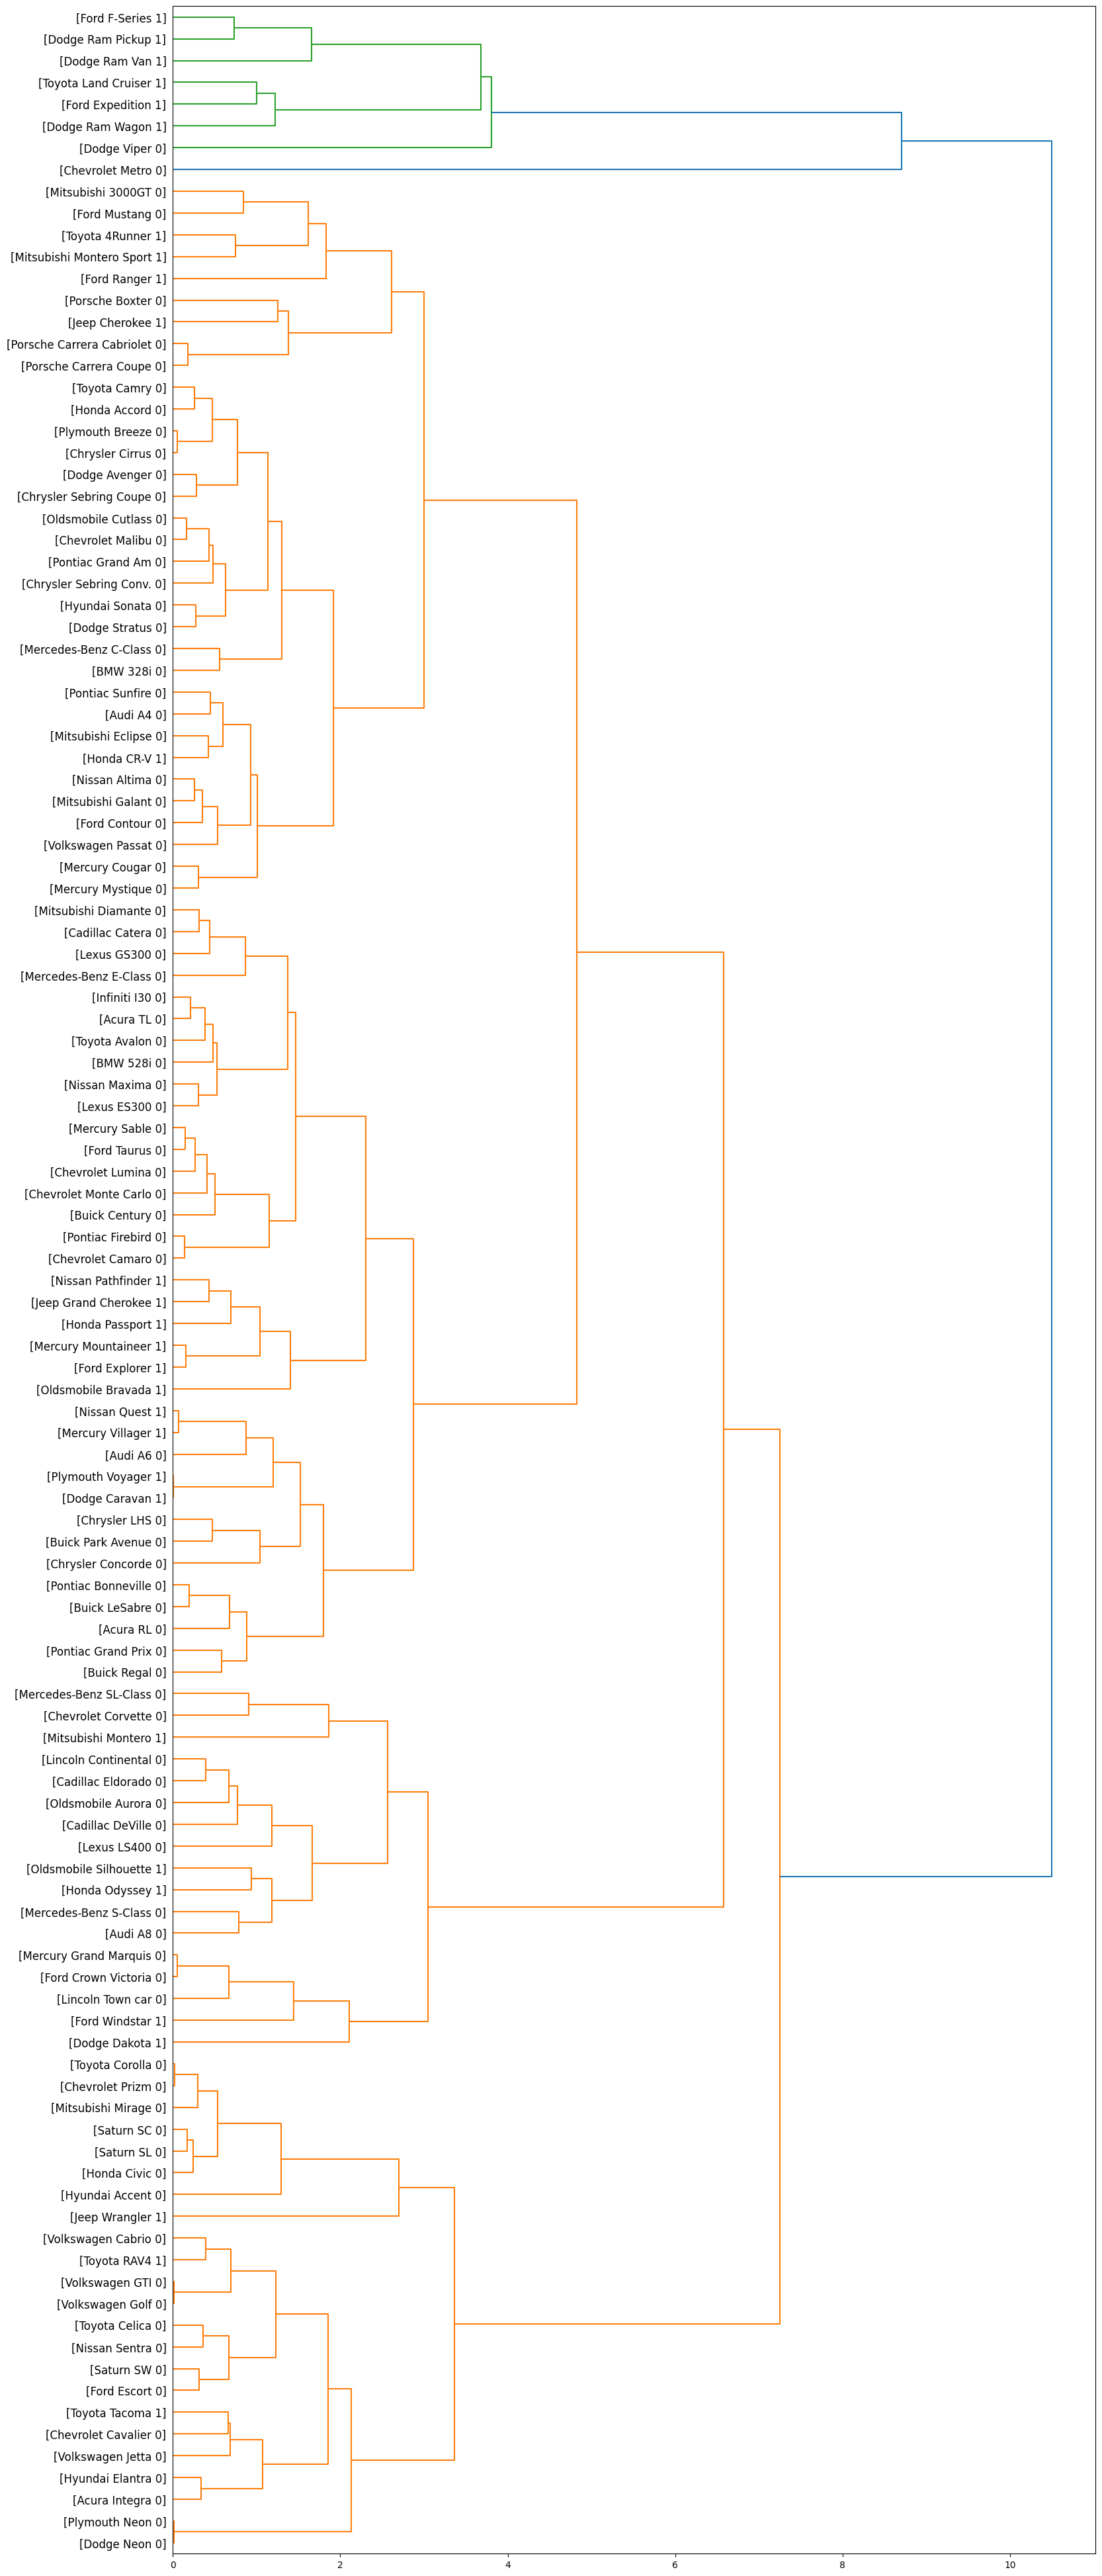

In [20]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return "[%s %s %s]" % (pdf["manufact"][id], pdf["model"][id], int(float(pdf["type"][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = "right")

<h2 id="clustering_using_skl">scikit-learn خوشه‌بندی با استفاده از </h2>

بیایید دوباره این کار را انجام دهیم، اما این بار با استفاده از بسته scikit-learn:

In [21]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [22]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, "complete")

C:\Users\mrb\AppData\Local\Temp\ipykernel_3740\544333723.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, "complete")


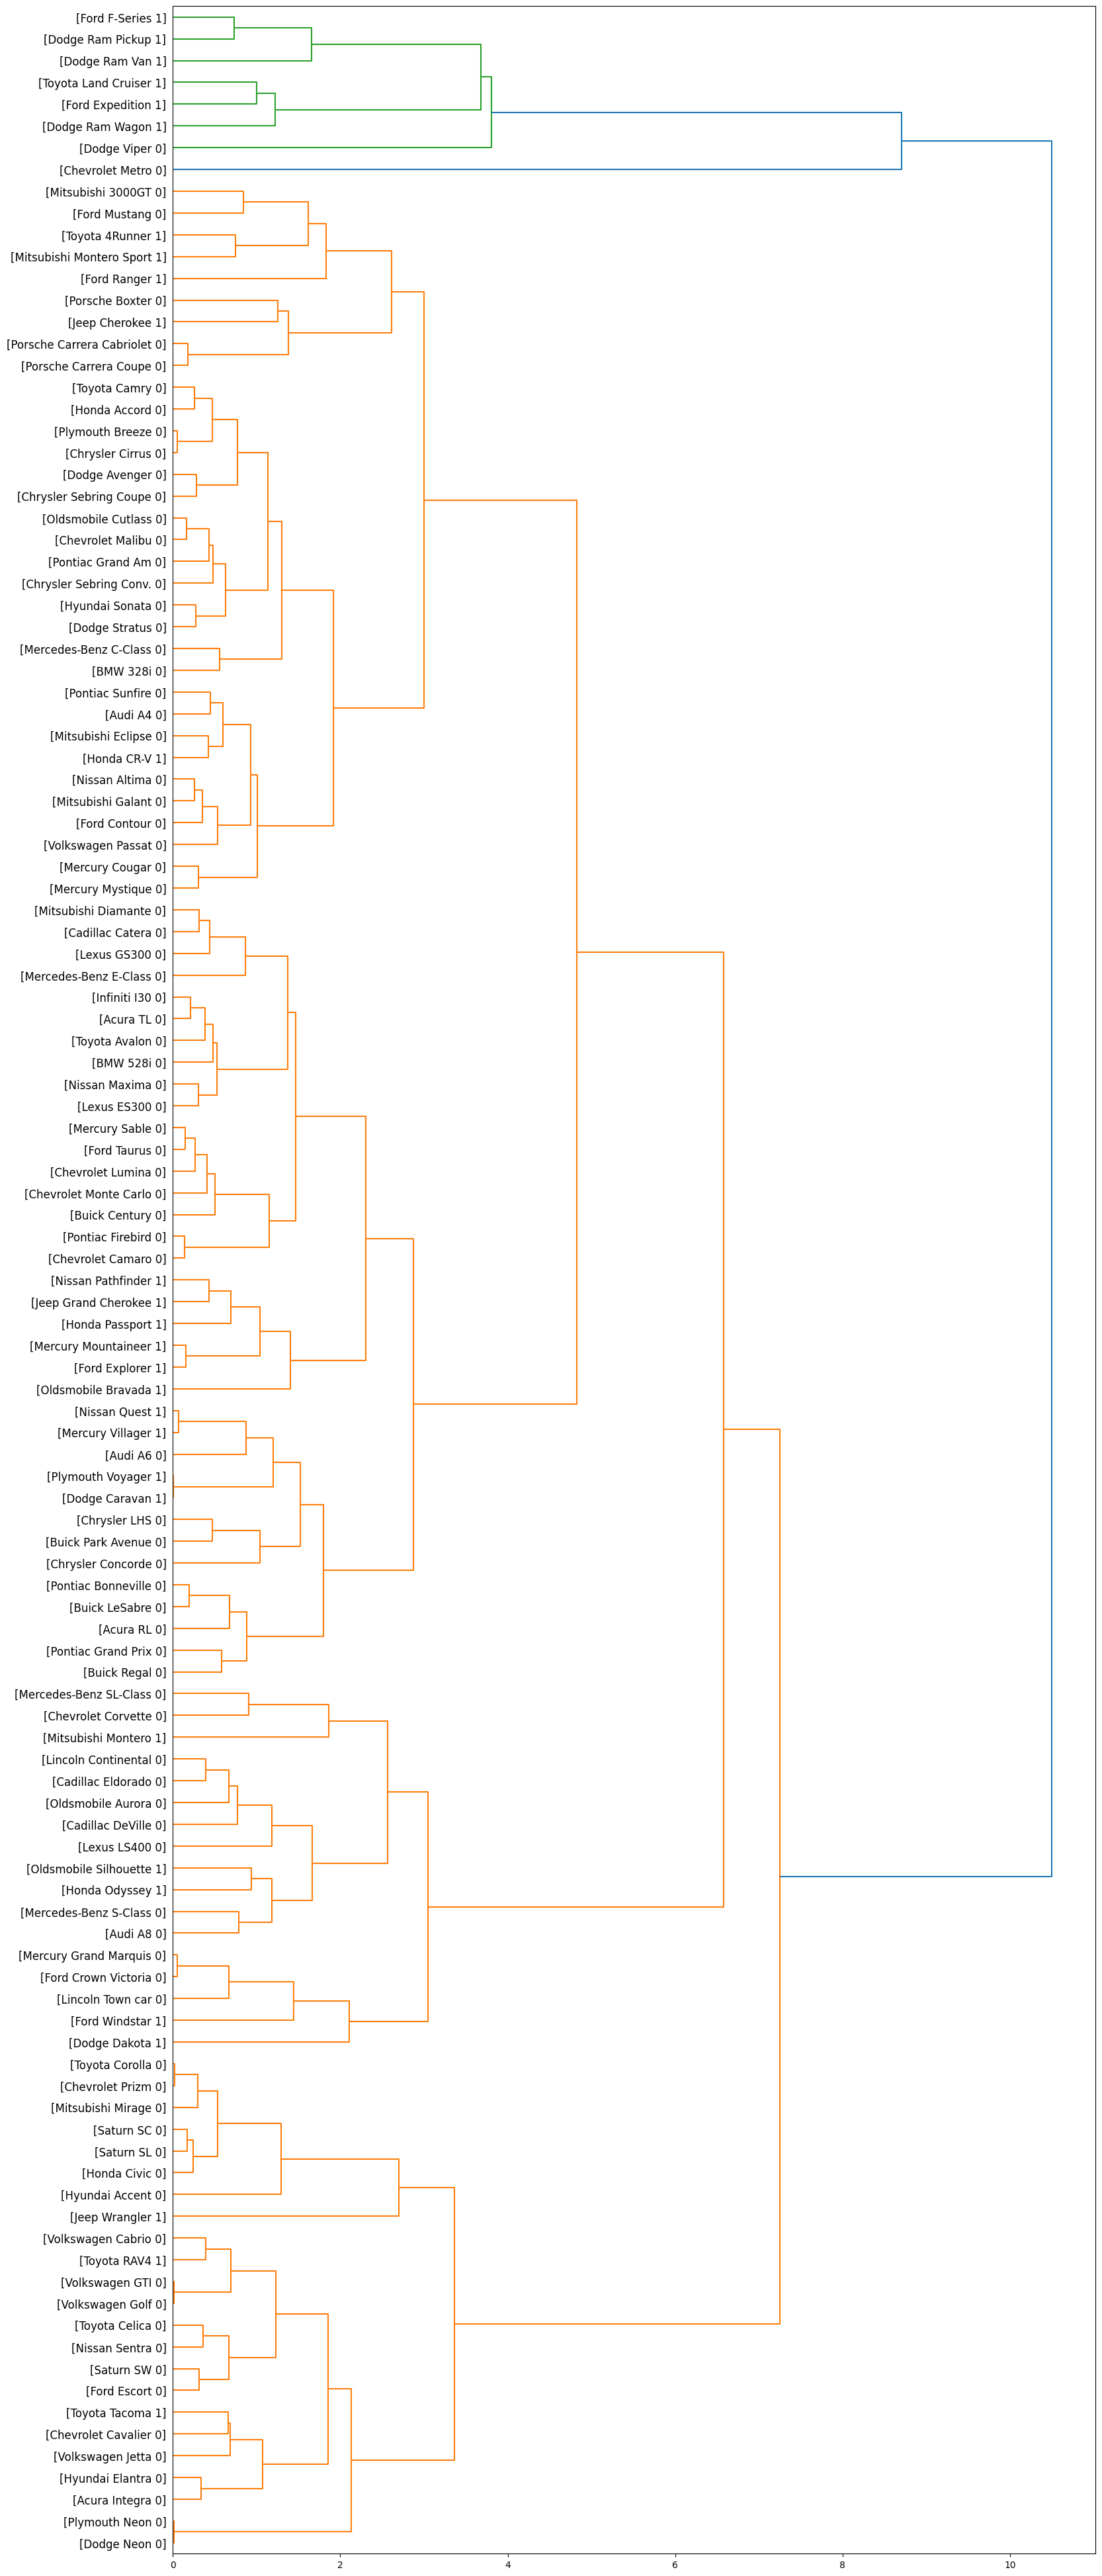

In [23]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return "[%s %s %s]" % (pdf["manufact"][id], pdf["model"][id], int(float(pdf["type"][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = "right")

حالا، می‌توانیم از تابع $"AgglomerativeClustering"$ در کتابخانه $scikit\_learn$ برای خوشه‌بندی مجموعه داده استفاده کنیم. $AgglomerativeClustering$ یک خوشه‌بندی سلسله‌مراتبی با استفاده از یک رویکرد از پایین به بالا انجام می‌دهد. معیار پیوند، متریک مورد استفاده برای استراتژی ادغام را تعیین می‌کند:

* در  **$Ward$** مجموع مربعات تفاوت‌ها را در تمام خوشه‌ها به حداقل می‌رساند این یک رویکرد کمینه‌سازی واریانس است و از این نظر شبیه به تابع هدف $k\_means$ است اما با یک رویکرد سلسله‌مراتبی تجمعی حل می‌شود
*   در **$Maximum$ یا $complete linkage$** حداکثر فاصله بین مشاهدات جفت خوشه‌ها را به حداقل می‌رساند
*   و **$Average linkage$** میانگین فاصله بین تمام مشاهدات جفت خوشه‌ها را به حداقل می‌رساند

In [24]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = "complete")
agglom.fit(dist_matrix)

agglom.labels_

c:\Users\mrb\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

می‌توانیم یک فیلد جدید به $dataframe$ خود اضافه کنیم تا خوشه مربوط به هر سطر را نشان دهد

In [25]:
pdf["cluster_"] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


C:\Users\mrb\AppData\Local\Temp\ipykernel_3740\833519608.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label="cluster"+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

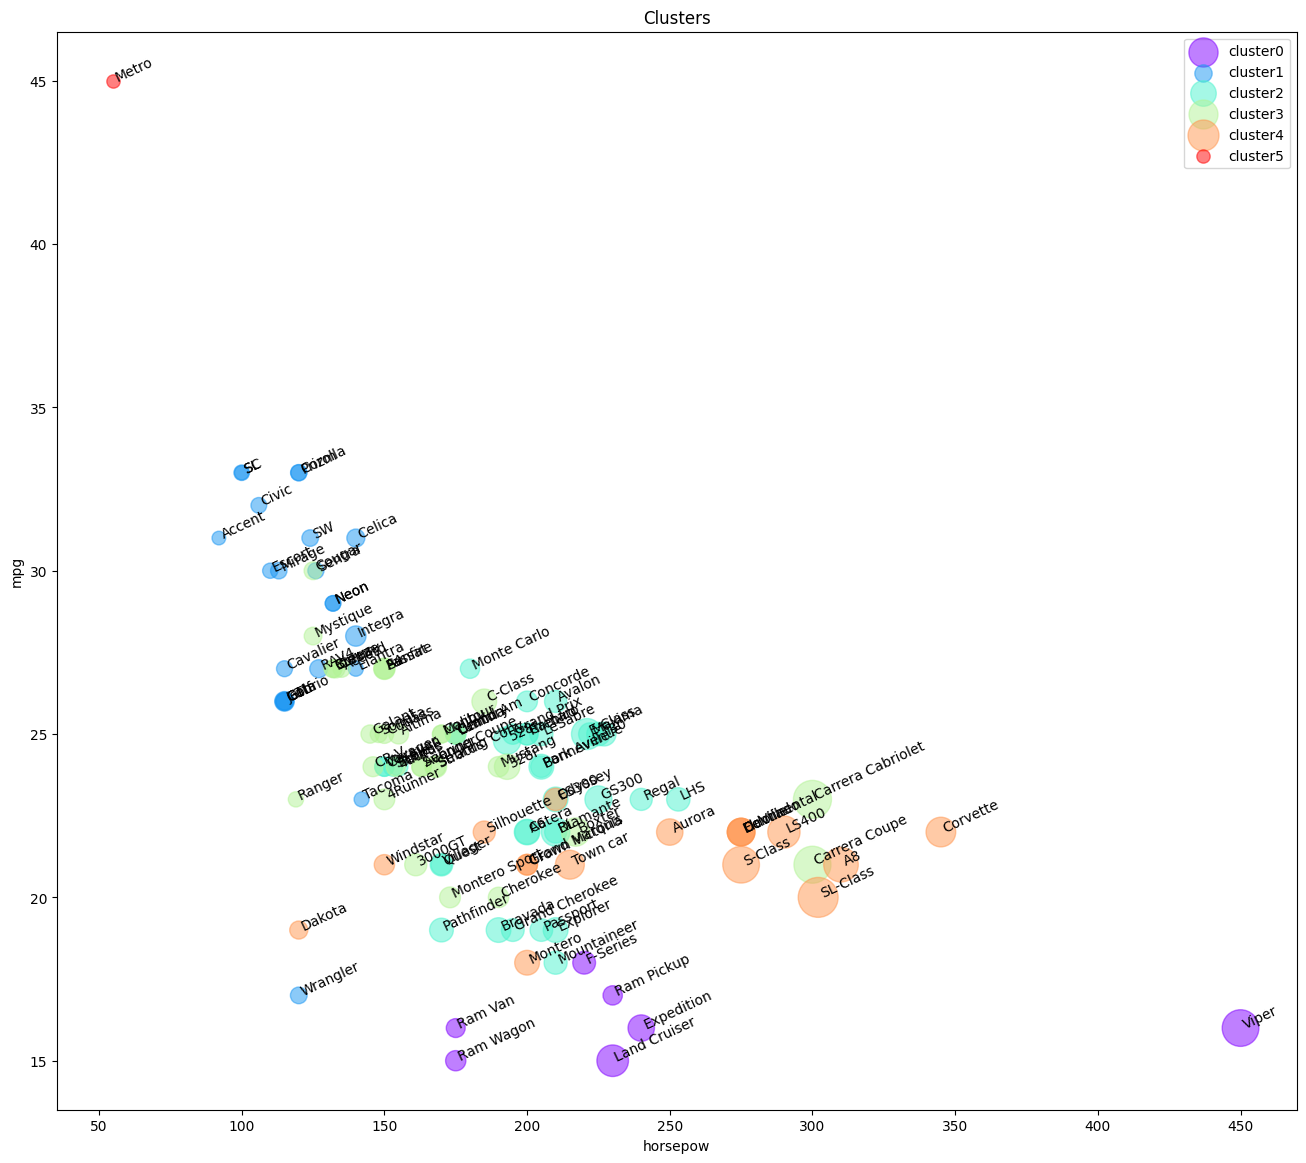

In [26]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset["model"][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label="cluster"+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title("Clusters")
plt.xlabel("horsepow")
plt.ylabel("mpg")

همانطور که مشاهده می‌کنید، ما توزیع هر خوشه را با استفاده از نمودار پراکندگی می‌بینیم، اما مکان مرکز هر خوشه به وضوح مشخص نیست

علاوه بر این، دو نوع وسیله نقلیه در مجموعه داده ما وجود دارد: "کامیون" (مقدار 1 در ستون $type$) و "ماشین" (مقدار 0 در ستون $type$)

بنابراین، از آنها برای تشخیص کلاس‌ها و خلاصه‌سازی خوشه استفاده می‌کنیم. ابتدا تعداد موارد در هر گروه را می‌شماریم

In [27]:
pdf.groupby(["cluster_","type"])["cluster_"].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

حالا می‌توانیم به ویژگی‌های هر خوشه نگاه کنیم

In [28]:
# agg_cars = pdf.groupby(["cluster_","horsepow","engine_s","mpg","price"])["cluster_"].mean()

agg_cars = pdf.groupby(["cluster_","type"]).agg({
    "horsepow": "mean",
    "engine_s": "mean",
    "mpg": "mean",
    "price": "mean"
}).reset_index()


واضح است که سه خوشه اصلی داریم که اکثر وسایل نقلیه در آنها قرار گرفته‌اند

**ماشین‌ها**:

*   خوشه ۱: با مصرف سوخت تقریباً بالا و قدرت اسب‌بخار پایین
*   خوشه ۲: با مصرف سوخت مناسب و قدرت اسب‌بخار خوب، اما قیمتی بالاتر از میانگین
*   خوشه ۳: با مصرف سوخت پایین، قدرت اسب‌بخار بالا و بالاترین قیمت

**کامیون‌ها**:

*   خوشه ۱: با تقریباً بالاترین مصرف سوخت در بین کامیون‌ها و کمترین قدرت اسب‌بخار و قیمت
*   خوشه ۲: با مصرف سوخت تقریباً پایین و قدرت اسب‌بخار متوسط، اما قیمتی بالاتر از میانگین
*   خوشه ۳: با مصرف سوخت مناسب و قدرت اسب‌بخار خوب و قیمت پایین

لطفاً توجه داشته باشید که ما از **نوع** و **قیمت** خودروها در فرآیند خوشه‌بندی استفاده نکردیم، اما خوشه‌بندی سلسله‌مراتبی توانست خوشه‌ها را تشکیل دهد و آنها را با دقت نسبتاً بالایی از هم متمایز کند

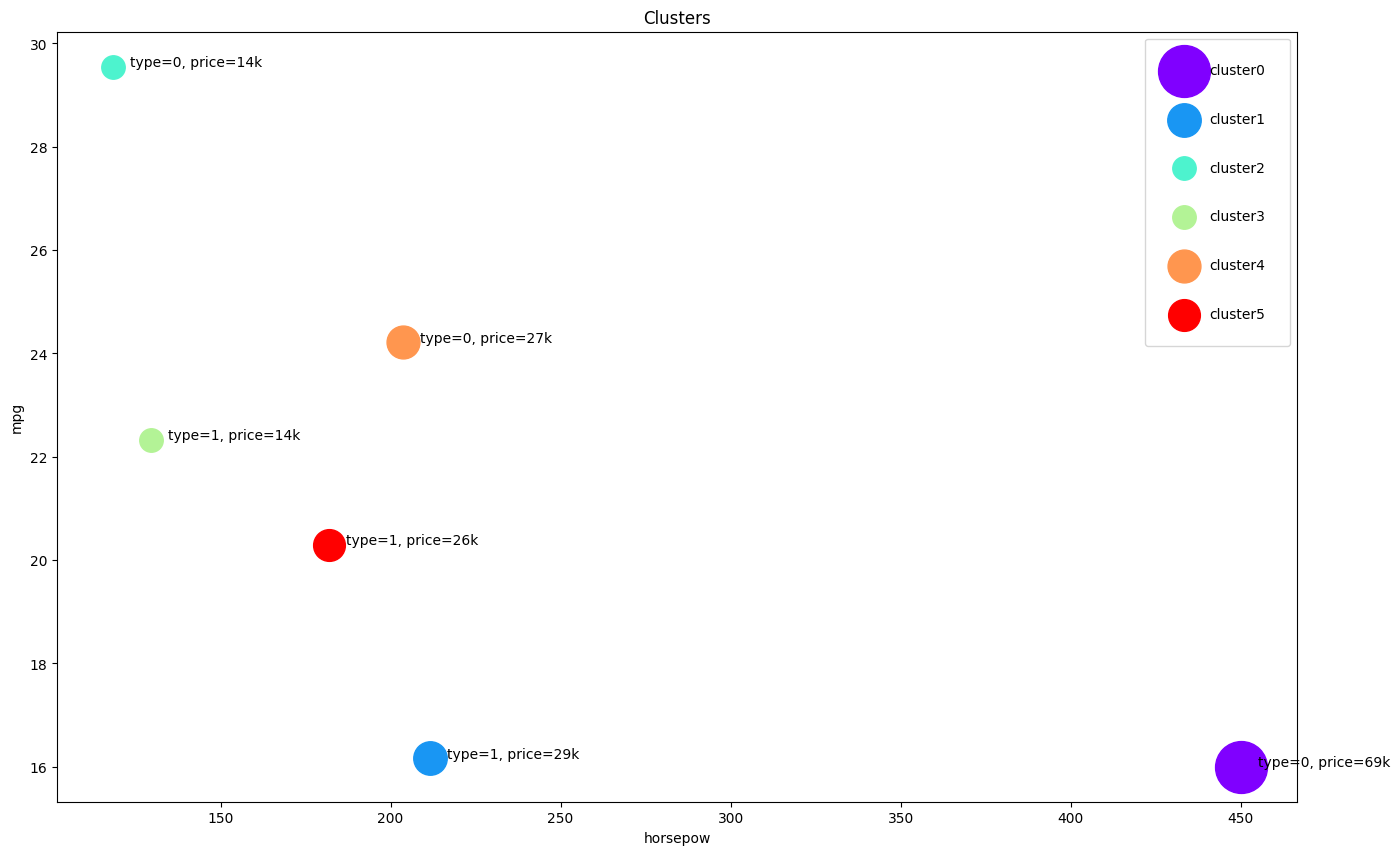

In [29]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    
    for i in subset.index:
        # plt.text(subset.loc[i][0]+5, subset.loc[i][2], "type="+str(int(i)) + ", price="+str(int(subset.loc[i][3]))+"k")
        plt.text(subset.loc[i,"horsepow"]+5, subset.loc[i,"mpg"], "type="+str(int(subset.loc[i,"type"])) + ", price="+str(int(subset.loc[i,"price"]))+"k")
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, color=color, label="cluster"+str(label))

plt.legend(borderpad=1.8, labelspacing=2.5, handlelength=2)
plt.title("Clusters")
plt.xlabel("horsepow")
plt.ylabel("mpg")
plt.show()


<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
